We've seen that the `lm()` function in `R` provides a wealth of information about our linear models, but the output is cumbersome to work with:

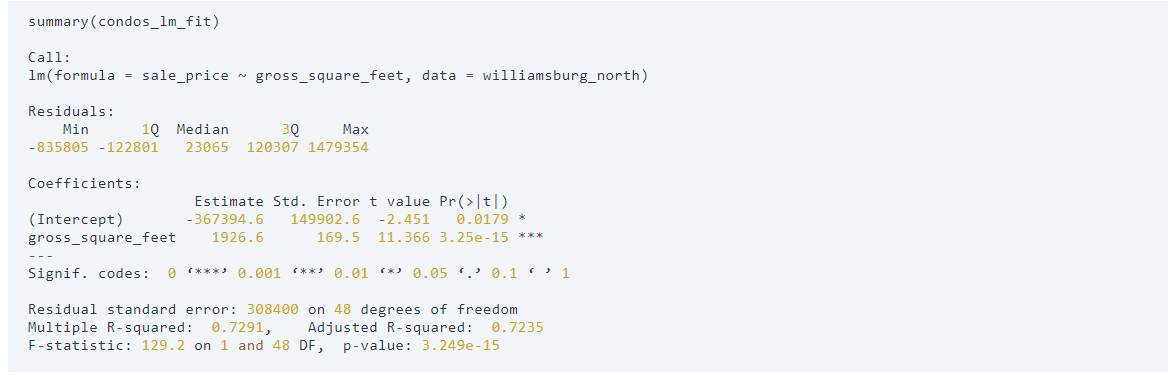

Summary statistics and error metrics can be extracted from the model object output with indexing or helper functions like `coefficients()`, but this interrupts our workflow. What if we need to develop numerous linear models, and compare their results? And what if, for example, we want to perform linear regressions of `sale_price` on the basis of `gross_square_feet` for condominiums in each Brooklyn neighborhood individually? Let's learn how to do this with powerful [tidyverse](https://www.tidyverse.org/) tools!

In this file we will learn how to scale-up our linear regression modeling skills by fitting many linear models at once using tidyverse tools. The `lm()` output is definitely not tidy! Fortunately the [`broom` package](https://broom.tidymodels.org/) in R was developed to make working with many tidy models possible.

As discussed, the `lm()` output is not [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The `broom` package takes the messy output of built-in modeling functions in `R`, such as `lm()` and returns a tidy dataframe. With the data in a tidy format we are able to leverage the tidyverse tools that we know, and some tidyverse tools that we don't yet know to build and compare many linear models

The `broom` package tidies the outputs of more than one hundred models, so the knowledge gained in this file applies broadly to modeling in `R`, not just to `lm()` output. The `broom` package includes three functions, which are:

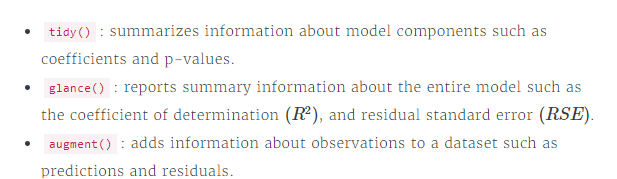

These functions are detailed in [this vignette](https://cran.r-project.org/web/packages/broom/vignettes/broom.html). The `broom` package works well with tidyverse tools, namely with functions from the `dplyr`, `tidyr` and `purrr` packages. 

In fact, `broom` becomes a much more powerful analysis tool because of its compatibility with tidyverse tools as described in [this vignette](https://cran.r-project.org/web/packages/broom/vignettes/broom_and_dplyr.html).

In this file we will start by exploring a single function from the `broom` package, [`tidy()` function](https://broom.tidymodels.org/), and then we will combine the function with tidyverse tools to generate many linear models.

The `tidy()` function returns the summarized information about the components of a model. The `tidy()` function requires `x`, a model object, as input and includes an optional argument for confidence intervals. In the example below, `lm_fit` refers to any `lm` object created by `lm()`:

`library(broom)
tidy(x = lm_fit)`

The output from `tidy()` is much easier to digest than the standard `lm` object `summary()` output. And because the format is a `tidy` dataframe where each row is an observation and each column is a variable, we can combine this output with other models. In other words, we can stack many model outputs together in a single dataframe.

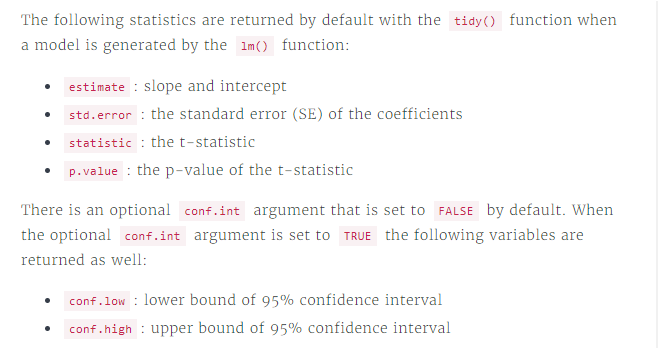

Note that the confidence interval is set to `0.95` or 95% by default, but this can be changed with the optional `conf.level` function argument.

Recall that the `lm()` output is stored as a list. It takes considerable work to convert `lm()` output to a dataframe. We learned that to obtain the information bulleted above, we can view the same information with the `summary()` function:

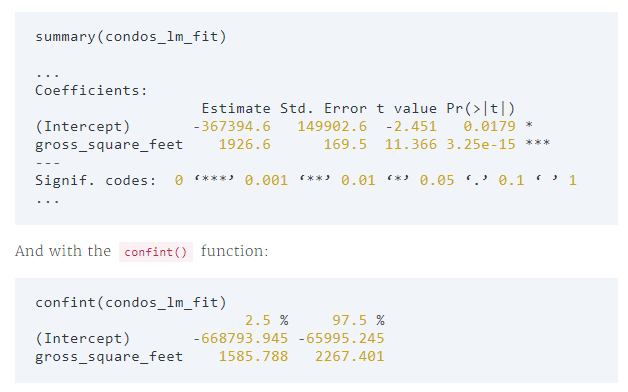

Note we've only included a portion of the `summary()` output! The tidy dataframe returned by the `broom` function `tidy()` contains much of the same information above in a more usable format. For example, here is a look at the tidy dataframe we will generate

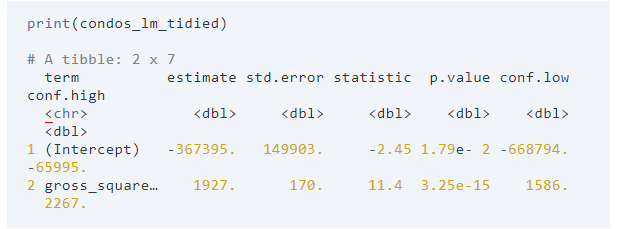

**Task**

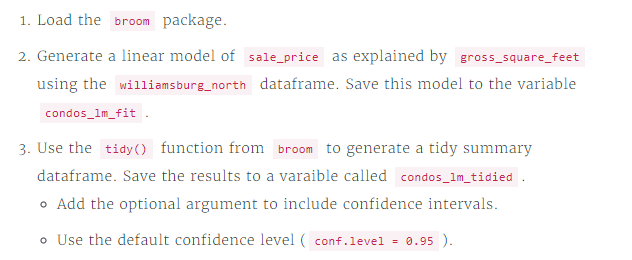

Call the `summary()` function on the linear model object. Take a look at the contents of `lm_tidied` and compare it to the `summary()` output.

**Answer**

`library(readr)`

`williamsburg_north <- suppressMessages(read_csv("williamsburg_north.csv"))`

`library(broom)`

`condos_lm_fit <- lm(sale_price ~ gross_square_feet, data = williamsburg_north)`

`condos_lm_tidied <- tidy(x = condos_lm_fit, conf.int = TRUE)`

Now that we've covered the basics of the `tidy()` function from the `broom` package, we will learn how to combine the functions with tidyverse tools to scale-up the functionality. But first let's take a quick look at the results from our above exercise where we tidied the `williamsburg_north` dataframe with statistics resulting from modeling `sale_price` as explained by `gross_square_feet`. 

When we view the structure of the dataframe, we can see that there is one row for statistics associated with the intercept estimate, and one row for statistics associated with the slope estimate:

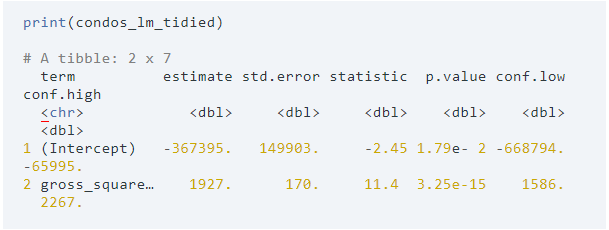

When the goal is to generate many linear models, the `tidy()` process (or `broom::augment()` and `broom::glance()`) can be applied to each model/data combination individually. In the example above, the model is a linear regression of `sale_price` explained by `gross_square_feet` and the data is the `williamsburg_north` dataframe only.

Next we will perform linear regressions of `sale_price` explained by `gross_square_feet` for 10 Brooklyn neighborhoods at once! 

We will work with two datasets. For teaching purposes, we provide examples using a dataset called `williamsburg_condos` that contains all sale records for condominiums in the four Williamsburg neighborhoods. This teaching dataset will allow us to explore the process of generating linear models for the four distinct Williamsburg neighborhoods.

We will use a larger dataset called `brooklyn_top_ten` that contains condominium sale records for the 10 Brooklyn neighborhoods with the highest number of condominium sale records. Here is the code we used to generate the `brooklyn_top_ten` dataframe:

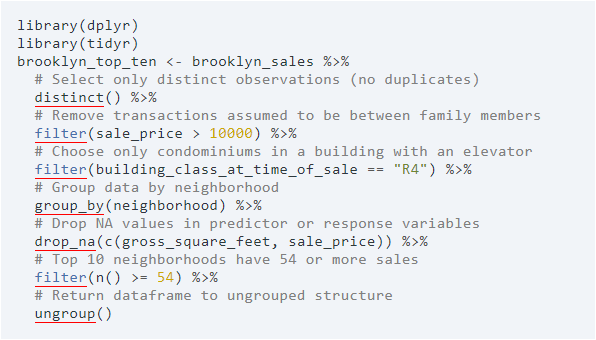

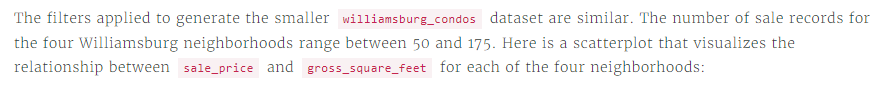

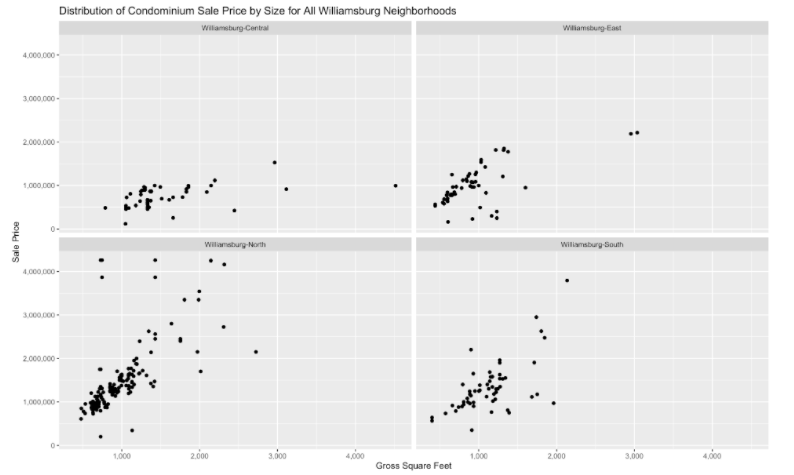

Let's learn how to generate many linear models with `broom`. The `broom` package offers three functions, but to start we will focus our attention on using the `tidy()` function. And more specifically our aim will be to extract the slope estimate, 
**^
β
1**
, for the model we generate for each neighborhood.

The `R` code that we are about to learn is elegant and concise. But to comprehend what is going on requires an understanding of data structures, modeling, and iteration.

The next to learn how to generate many linear models with `broom` is to learn about [nested data](https://tidyr.tidyverse.org/articles/nest.html). Nested data is central to the workflow with `broom`.

As described in [the documentation](https://tidyr.tidyverse.org/reference/nest.html), nesting is performed with the function `nest()` from the tidyverse `tidyr` package. Nesting uses a categorical variable to partition a single dataframe into a "list-column" of many dataframes. What this means is that nesting creates a dataframe that has one row per group, or category (`neighborhood` in our case), and the dataframe contains a special list-column `data` where each observation is itself a dataframe! This animation illustrates the data transformation:



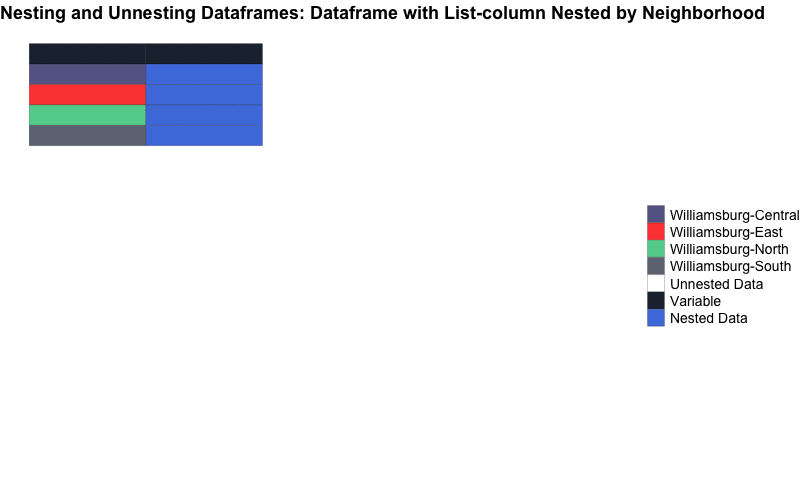

In [1]:
from IPython.display import Image

Image("unnest_animate_neighborhood.gif")

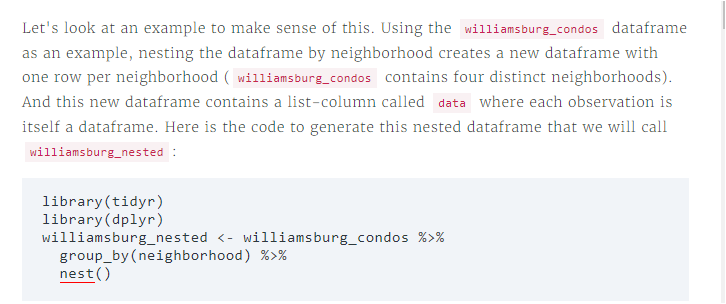

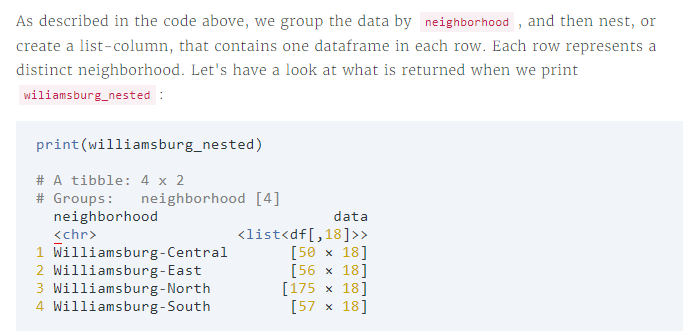

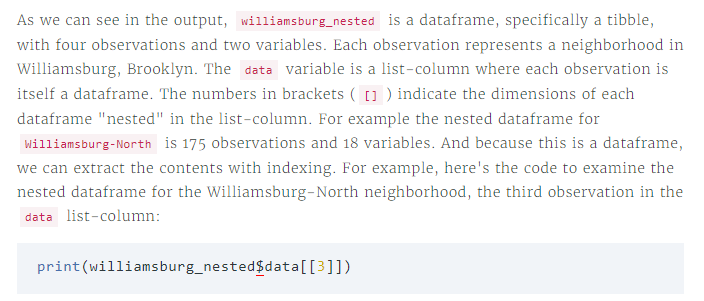

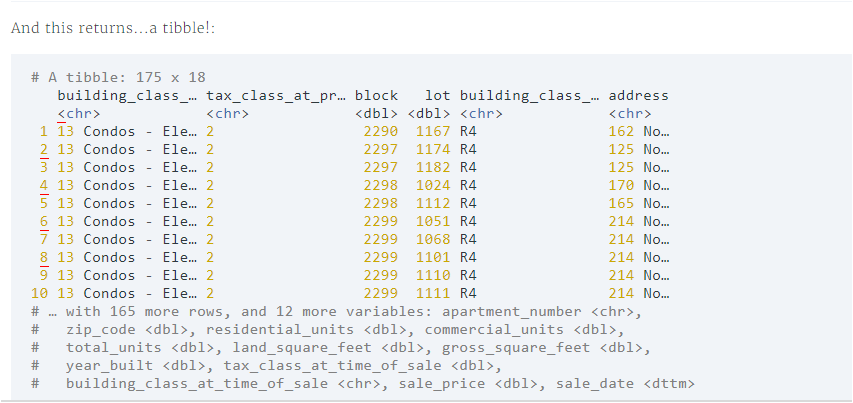

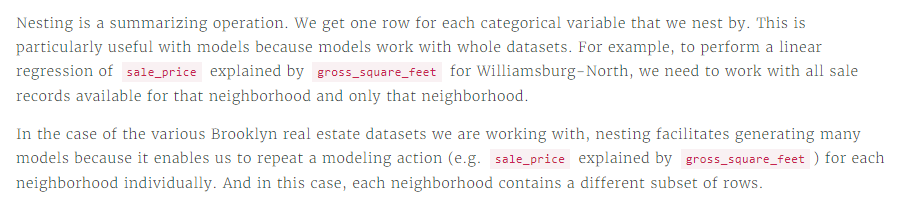

The opposite action unnesting, which is executed with the [`unnest()` function](https://tidyr.tidyverse.org/reference/nest.html) flattens the data back out into regular columns. In other words, unnesting reverses the nesting process. 

**Task**

1. Load the tidyverse packages required to 
    * group and manipulate data, and 
    * to nest data.
2. Nest the `brooklyn_top_ten` dataframe by neighborhood and assign the results to a variable named `brooklyn_nested`.
3. Index by position to extract and determine the neighborhood name of the sixth observation (index position) in the `brooklyn_nested` dataframe. 
4. Extract the nested dataframe in the sixth index position.

**Answer**

`library(tidyr)
library(dplyr)`

`brooklyn_nested <- brooklyn_top_ten %>% 
  group_by(neighborhood) %>% 
  nest()`

`# Return neighborhood name with:`

`# brooklyn_nested$neighborhood[[6]]`


`# Return dataframe for Madison`

`Madison <- brooklyn_nested$data[[6]]`